# 올림픽에는 어떤데이터가 ?



## 분석 방향
1. 여성
2. 나이
3. 국적
4. 동계, 하계
5. 동명이인
6. 대한민국데이터
7. 종목별 금메달 나이 평균
8. 결측치의 분포 / 어느종목에서 가장많은지? // 결측치 없는 데이터만 가지고 통계분석  -> 시간대에 따른 나이, 몸무게, 키에 대한 정보
9. 1904년도의 여자 나이대의 특수성 anova
10. 참여 국가수
11. 남녀의 국가별 시간에 따른 비율변화 (추세선그리기)
12. 남녀의 시간별 키, 몸무게 변화그래프
13. 일본과의 비교 , 북한과 비교

## 1. 데이터 전처리

데이터로드

In [1]:
import os

In [2]:
# os.chdir -> 데이터가 저장된 경로
os.chdir('../../../../data/00_Olympic')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
nr = pd.read_csv("noc_regions.csv")
ae = pd.read_csv("athlete_events.csv")

In [5]:
nr.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
ae.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
nr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [8]:
ae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
nr.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

결측치는 region :3 , notes :209개 존재

데이터 상으로 region 영역에 중복데이터가 포함되어있다. 

In [10]:
len(nr['NOC'].unique())

230

noc_regions 데이터의 NOC컬럼은 230의 유니크 값을 가진다 (== 전체 row의 NOC값은 유니크 하다)

## 2.데이터 EDA

```{admonition} Question 1
:class: hint
**noc_regions.csv 데이터에서 region이 같지만 NOC 혹은 notes값이 다른 데이터들만 추출하여 duplicates_nation 변수에 저장한 후  region의 알파벳 순으로 정렬  상위 10개의 데이터를 출력하라.**
```

In [11]:
duplicates_nation = nr.loc[nr.region.isin(nr.loc[set(range(len(nr)))-set(list(nr[['region']].drop_duplicates().index))].region)].sort_values('region').reset_index(drop=True)

In [12]:
duplicates_nation.head(10)

,NOC,region,notes
0,ANZ,Australia,Australasia
1,AUS,Australia,NaN
2,CAN,Canada,NaN
3,NFL,Canada,Newfoundland
4,CHN,China,NaN
5,HKG,China,Hong Kong
6,CZE,Czech Republic,NaN
7,TCH,Czech Republic,NaN
8,BOH,Czech Republic,Bohemia
9,FRG,Germany,NaN


```{admonition} Question2
:class: hint
**athlete_events.csv를 이용하여 duplicates_nation에 존재하는 NOC마다 몇 개의 데이터가 있는지 확인하라. 결과는 'duplicate_counts' 컬럼으로 만들고 상위10개데이터를 출력하라.**
```

In [13]:
def count_NOC(x):
    df = ae.loc[ae.NOC ==x]
    return len(df)

duplicates_nation['duplicate_counts']  = duplicates_nation['NOC'].apply(count_NOC)

In [14]:
duplicates_nation.head(10)

,NOC,region,notes,duplicate_counts
0,ANZ,Australia,Australasia,86
1,AUS,Australia,NaN,7638
2,CAN,Canada,NaN,9733
3,NFL,Canada,Newfoundland,1
4,CHN,China,NaN,5141
5,HKG,China,Hong Kong,685
6,CZE,Czech Republic,NaN,1874
7,TCH,Czech Republic,NaN,4404
8,BOH,Czech Republic,Bohemia,153
9,FRG,Germany,NaN,3315


```{admonition} Question 3
:class: hint
**athlete_events.csv 데이터에서 Games 컬럼은 Year , Season 컬럼의 합처럼 보인다. 예외경우가 있는지 확인하여라**
```

In [15]:
test_set  = ae['Year'].astype('str')+" "+ ae['Season']

In [16]:
((test_set ==ae['Games'] )-1).sum()

0

```{admonition} Answer
**boolen 데이터의 False ==0, True==1 이기 때문에 다른 경우가 있다면 값이 0보다 크게 나올것이다. 결과값은 0 으로 예외의 경우는 없음을 확인**
```

```{admonition} Question 4
:class: hint
**athlete_events.csv 데이터에서 Gold medal 데이터만 추출하고, 년도 변화에 따른 NOC의 Gold medal 갯수를 데이터 프레임화 하라**
```

In [17]:
ae_gold = ae.loc[ae.Medal =='Gold']
ae_gold2=ae_gold.groupby(['NOC','Year']).count()['ID']
ae_gold3=ae_gold2.reset_index()
ae_gold4=ae_gold3.pivot(index='NOC',columns='Year',values='ID').fillna(0)

In [18]:
ae_gold4

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
NOC,,,,,,,,,,,,,,,,,,,,,
ALG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ANZ,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,3.0,...,0.0,0.0,0.0,28.0,0.0,20.0,0.0,1.0,0.0,21.0
ARM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AUS,2.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,...,0.0,60.0,2.0,49.0,1.0,31.0,2.0,18.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UZB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,4.0
VEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
VIE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


```{admonition} Question 5
:class: hint
**athlete_events.csv 데이터에서 Games 컬럼을 기준으로 년도별 게임의 Hieght , Weight의 결측치 갯수를 나타내는 아래와 같은 데이터 프레임 nan_hw변수에 저장하고 상위 10개 데이터를 출력하라**
```

In [19]:
import numpy as np

In [20]:
Height = ae.loc[np.isnan(ae.Height)].groupby(['Games']).count()['ID'].reset_index().rename(columns={'ID':'Nan_Height'})
Weight = ae.loc[np.isnan(ae.Weight)].groupby(['Games']).count()['ID'].reset_index().rename(columns={'ID':'Nan_Weight'})
nan_hw = pd.merge(Height,Weight)
nan_hw.head(10)

,Games,Nan_Height,Nan_Weight
0,1896 Summer,334,331
1,1900 Summer,1820,1857
2,1904 Summer,1088,1154
3,1906 Summer,1476,1528
4,1908 Summer,2626,2618
5,1912 Summer,3319,3444
6,1920 Summer,3525,3821
7,1924 Summer,4348,4584
8,1924 Winter,371,419
9,1928 Summer,4139,4322


```{admonition} Question 6
:class: hint
**nan_hw의 total_nan 컬럼을 만들어 Games 별 Height 와 Weight의 결측치의 갯수의 합을 구하여라**
```

In [21]:
nan_hw['total_nan']  =nan_hw['Nan_Height'] +nan_hw['Nan_Weight']
nan_hw.head(10)

,Games,Nan_Height,Nan_Weight,total_nan
0,1896 Summer,334,331,665
1,1900 Summer,1820,1857,3677
2,1904 Summer,1088,1154,2242
3,1906 Summer,1476,1528,3004
4,1908 Summer,2626,2618,5244
5,1912 Summer,3319,3444,6763
6,1920 Summer,3525,3821,7346
7,1924 Summer,4348,4584,8932
8,1924 Winter,371,419,790
9,1928 Summer,4139,4322,8461


```{admonition} Question 7
:class: hint
**athlete_events.csv 데이터에서 년도별 게임 (Games)별 남자와 여자의 참가자수를 데이터 프레임을 gender_df변수에 저장하고 상위10개데이터를 다음과 같이 출력하라**
```

In [22]:
gender_df = ae.groupby(['Games','Sex']).count()['ID'].reset_index()
gender_df = gender_df.pivot(index="Games",columns='Sex',values='ID')

In [23]:
gender_df.head(10)

Sex,F,M
Games,,
1896 Summer,NaN,380.0
1900 Summer,33.0,1903.0
1904 Summer,16.0,1285.0
1906 Summer,11.0,1722.0
1908 Summer,47.0,3054.0
1912 Summer,87.0,3953.0
1920 Summer,134.0,4158.0
1924 Summer,244.0,4989.0
1924 Winter,17.0,443.0


```{admonition} Question 8
:class: hint
**gender_df에서 Winter, Summer 데이터를 각각 추출하여 남여의 년도별 변화 plot 그래프를 아래와 같이 그려라**
```

In [24]:
winter_df = gender_df.loc[gender_df.index.str.contains('Winter')]
summer_df = gender_df.loc[gender_df.index.str.contains('Summer')]

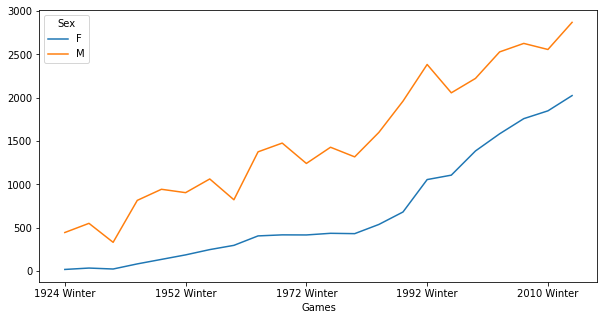

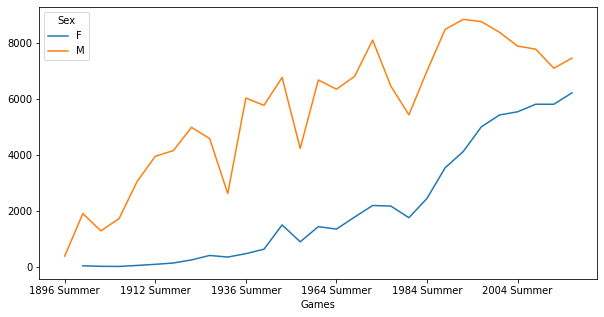

In [25]:
winter_df.plot(figsize=(10,5))
plt.show()
summer_df.plot(figsize=(10,5))
plt.show()

## 3.통계분석

## 4.장바구니분석

## 5.시계열 분석

## 6.예측 모델링